## MTH 9879 Market Microstructure Models, Spring 2019

<p>

### Lecture 6: Variance and covariance estimation

<p>
Jim Gatheral   
Department of Mathematics   
  
  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "center" width=500></h3>




$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\cL}{\mathcal{L} }
\newcommand{\cG}{\mathcal{G} }
\newcommand{\Xv}{X^{(v)}}
\newcommand{\s}{\mathcal{S} }
\newcommand{\cE}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\angl}[1]{{\langle{#1}\rangle}}
$$




## Outline of Lecture 6

-   Uses of volatility estimates

-   Market microstructure bias

-   A survey of estimation and forecasting algorithms

-   Experimental results



### Motivation

-   We often need to estimate in-sample volatility. Typically we need a
    good volatility estimate to reduce errors in estimating parameters
    of:

    -   Market impact models

    -   Limit order fill models
    
    - Market making: Avellaneda and Stoikov (Lecture 3) and other such algorithms need volatility forecasts.

-   Volatility forecasting models
    - Without good in-sample volatility  estimates, how can we even assess the quality of volatility forecasts?
    - Also, it has been shown that the performance of volatility
    forecasting models may be improved if they use better estimates of
    realized variance.

### Uses of volatility forecasts

-   Option valuation

-   Risk estimation

-   Order fill probability

-   For the first two of these, we need to estimate the width of the
    distribution of relatively long-timescale returns.

-   For the order fill probability, we need a volatility to estimate the
    first passage time density. Given that the underlying stochastic
    process is not Brownian motion, there is no a priori reason why the
    volatility numbers required for these quite different computations
    should be the same.

-   We will focus on measuring the width of the distribution of returns.

### Choice of sampling scheme

It is important to sample in transaction time rather than in business
time or calendar time.

-   In transaction time, empirically observed returns (price change) from trade data are consistent with MA(1) (the Roll model).
    - Autocorrelation coefficients are insignificant after one lag.

-   In calendar time, with varying intensity, empirically observed
    returns are ARIMA.



### TAQ data cleaning

Data cleaning is critical. In Lecture 4, we already gave the Barndorff-Nielsen cleaning recipe implemented in the R-package `highfrequency`:

### Integrated variance or quadratic variation

Given a set of tick data, how can we measure the, say daily, variance? <br>
A possibility is to estimate the *integrated variance*, also known as the *quadratic variation* in the theory of semimartingale. We shall use both terms interchangeably hereafter. 

Recall that the *quadratic variation* $\angl{X}_t$ of the continuous stochastic process $X_t$ is defined by 

$$
\angl{X}_T:= \lim_{\|\Pi_n\| \to 0} \sum_{{t_i} \in \Pi_n} |\Delta X_{t_i}|^2
$$

provided the limit exist (in probability). 

Thus, the goal is to estimate the quadratic variation of the efficient log price from the transacted log price, i.e., tick data. However, the subtlety is that efficient price is not directly observable and is contaminated by market microstructure noises.

#### Note
- If the process $X$ has jumps, the quadratic variation $\angl{X}$ becomes

    $$
    \angl{X}_t = \angl{X^c}_t + \sum_{0 < s \leq t} |\Delta X_s|^2,
    $$

    where $X^c$ denotes the continuous part of $X$ and $\Delta X_s := X_s - X_{s^-}$ is the jump size at time $s$. In this case, the integrated variance usually refers to $\angl{X^c}$, i.e., the quadratic variation of the continuous part. 

- We shall always assume $X$ is a continuous process, thus no jumps, in the sequel. 

### Realized Variance

How to estimate the integrated variance from a given set of tick data? The naïve answer
would be to compute the statistic

$$
\sum_{i=1}^n \, \left(Y_{t_i} - Y_{t_{i-1}} \right)^2
= \sum_{i=1}^n \, \left( \Delta Y_{t_i} \right)^2, 
$$ 

where $Y_t = \log S_t$ and $S_t$ are successive prices in the dataset.

-   This estimator is called the *Realized Variance (RV)* estimator



### Notations

- Realized variance and realized covariance <br>
    Given a partition $\Pi = \{0 = t_1 < \cdots < t_n=T\}$ of the interval $[0, T]$, the realized variance $[X]_T^\Pi$ of the process $X_t$ sampled at $\Pi$ is defined by
$$
[X]_T^\Pi = \sum_{i=1}^n |X_{t_i} - X_{t_{i-1}}|^2.
$$
    Similiarly, the realized covariance between $X_t$ and $Y_t$ sampled at $\Pi$ is given by 
$$
[X, Y]_T^\Pi = \sum_{i=1}^n (X_{t_i} - X_{t_{i-1}})(Y_{t_i} - Y_{t_{i-1}})
$$

- Quadratic variation (integrated variance) and covariation <br>
    The quadratic variation of $X$ is defined by the limit
    $$
    \angl{X}_t = \lim_{\|\Pi_n\| \to 0} [X]_T^{\Pi_n} 
    $$
    provided the limit exists. $\Pi_n$ denotes a sequence of partitions of the interval $[0, T]$ such that $\|\Pi_n\| \to 0$ as $n \to \infty$, where $\|\Pi_n\|$ denotes the mesh of the partition $\Pi_n$. 

    Likewise, the covariation between and $X$ and $Y$ is defined by the limit
    $$
    \angl{X, Y}_t = \lim_{\|\Pi_n\| \to 0} [X, Y]_T^{\Pi_n}.
    $$



### Assumption
The log price $X_t$ follows the Ito process

$$
dX_t = \mu_t dt + \sigma_t dW_t,
$$

where $W_t$ is a Brownian motion. Under the assumption,
$\angl{X}_t = \int_0^t \sigma_\tau^2 d\tau$.



### An exact relation

- Let $X_t := \log S_t$ be the log-price and $r_t := \Delta X_t = X_t - X_{t-1}$ the log-return.
-   The following relation is exact:
    $$
    (X_T - X_0)^2 = \sum_{i = 1}^T \, r_i^2 + 2 \sum_{k = 1}^{T-1}\,\gamma(k),
    $$
    where $\gamma(k) = \sum_{i = 1}^{T-k} r_i \, r_{i+k}$ is the $k$th realized autocovariance.


-   So if returns $r_t$ are serially uncorrelated then an unbiased and
    efficient estimate of the daily (realized) variance can be obtained as
    the sum of squared intra-day returns (RV).
    

#### Note
Should $X_t$ be a martingale, $\Delta X_i$ and $\Delta X_j$ will be uncorrelated for $i \neq j$. 

-   However, intra-day returns sampled at the highest frequency will
    generally exhibit serial correlation thereby invalidating RV as a
    reliable variance estimator.


-   The estimators we discuss below are all motivated by this reasoning
    and aim to provide improved measures of the realized variance.

### Microstructure noise

In the limit of very high sampling frequency, RV picks up mainly market
microstructure noise. To see this, suppose that the observed price $Y_t$
is given by

$$Y_t =X_t +\epsilon_t,$$

where $X_t$ is the value of the
underlying (log-)price process of interest and $\epsilon_t$ is a random
market microstructure-related noise term, assumed independent of $X_t$. Suppose we sample the price
series $n+1$ times (so that there are $n$ price changes) at $\Pi=\{0=t_0 < \cdots < t_n = T\}$ in the time interval $[0, T]$. 

Note that, conditioned on $\cF_T^X$, the conditional expectation of the realized variance of transacted (log) price satisties

\begin{eqnarray*}
\Eof{[Y]_T^\Pi |\cF_T^X} &:=& \sum_{i=1}^n \Eof{(\Delta Y_{t_i})^2|\cF_T^X} \\
&=& \sum_{i=1}^n \, (\Delta X_{t_i})^2 + 2 \sum_{i=1}^n \Delta X_{t_i} \Eof{\Delta \epsilon_{t_i}|\cF_T^X} + \sum_{i=1}^n \Eof{(\Delta \epsilon_{t_i})^2|\cF_T^X} \\
&=& [X]_T + 2 n \, \mbox{var}[\epsilon] \\
&\approx& \angl{X}_T + 2 n \, \mbox{var}[\epsilon].
\end{eqnarray*}

#### Note
The difference between $[X]_T$ and $\angl{X}_T$ is referred to as the *discretization error*, which is usually controled by the integrated quarticity $\int_0^T \sigma_t^4 dt$. 

### Asymptotic result

A more detailed, but more technical, asymptotic analysis shown in [Zhang, Mykland and Aït-Sahalia]<sup id="cite_ref-ZMA" class="reference"><a href="#cite_note-ZMA">[9]</a></sup> yields that as $n \to \infty$

$$
[Y]^{\Pi}_T \mathop{\approx}^{\mathcal L} \angl{X}_T + 2 \, n \, \mbox{var}[\epsilon] + \sqrt{ 4 n \Eof{\epsilon^4} + \frac{2T}{n} \int_0^T \sigma_t^4 dt} \; Z,
$$

where $Z \sim N(0,1)$.

#### Note
- The naive RV estimator $[Y]_T^\Pi$ is biased by the variance of market microstructure noise $\epsilon$. The biasedness increases as the sampling frequency increases.  
- We see that as $n\to\infty$, the naive RV estimator $[Y]_T^\Pi$ picks up mainly the microstructure noise.

### BAC trades

In [89]:
download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2018/02/tqDataBAC_20170919.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")

In [2]:
load("tqDataBAC_20170919.rData")
Sys.setenv(TZ='EST')
tqBAC <- tqdata

In [4]:
library(highfrequency)
source("RvEstimators.R") # Code mostly due to Roel Oomen

In [5]:
# rescale the plot
options(repr.plot.height=5, repr.plot.width=10)

### BAC data from 19-Sep-2017.

In [6]:
head(tqBAC[5000:5100, ], 20)

                    SYMBOL EX  PRICE   SIZE    COND BID     BIDSIZ OFR    
2017-09-19 10:19:52 "BAC"  "K" "24.86" "100"   " "  "24.85" "1428" "24.86"
2017-09-19 10:19:54 "BAC"  "V" "24.86" "100"   " "  "24.85" "421"  "24.86"
2017-09-19 10:19:56 "BAC"  "B" "24.86" "400"   " "  "24.85" "5748" "24.86"
2017-09-19 10:19:56 "BAC"  "Z" "24.86" "100"   " "  "24.85" "394"  "24.86"
2017-09-19 10:19:56 "BAC"  "J" "24.86" "900"   " "  "24.85" "3953" "24.86"
2017-09-19 10:19:56 "BAC"  "Z" "24.86" "100"   " "  "24.85" "3953" "24.86"
2017-09-19 10:19:56 "BAC"  "Z" "24.86" "200"   " "  "24.85" "864"  "24.86"
2017-09-19 10:19:56 "BAC"  "Z" "24.86" "100"   " "  "24.85" "864"  "24.86"
2017-09-19 10:19:57 "BAC"  "V" "24.86" "100"   " "  "24.85" "419"  "24.86"
2017-09-19 10:19:58 "BAC"  "N" "24.86" "100"   " "  "24.85" "399"  "24.86"
2017-09-19 10:19:58 "BAC"  "Z" "24.86" "100"   " "  "24.85" "399"  "24.86"
2017-09-19 10:19:59 "BAC"  "Z" "24.86" "300"   " "  "24.85" "396"  "24.86"
2017-09-19 10:19:59 "BAC"

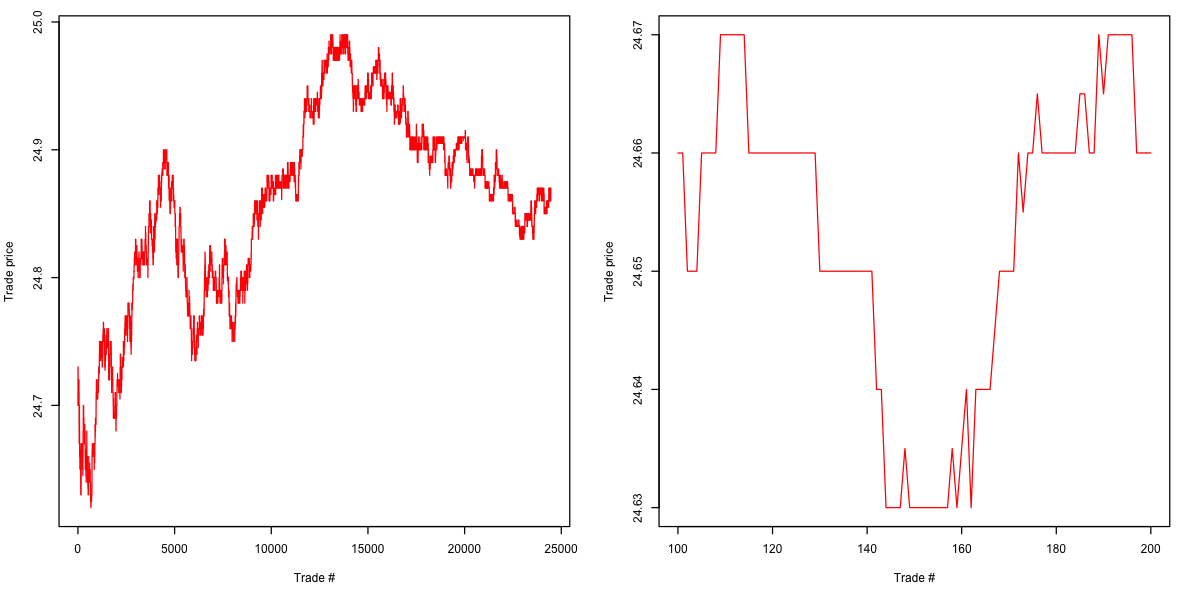

In [7]:
px <- tqBAC$PRICE
p <- as.numeric(px)

# Plot time series of trades
par(mar=c(5, 4, 1, 2) + 0.1)
par(mfrow=c(1,2), cex=0.6)
plot(p,col="red", type="l", ylab="Trade price", xlab="Trade #")

# Plot trades from 100 to 200
plot(100:200, p[100:200], col="red", type="l", ylab="Trade price", xlab="Trade #")

# restore plot setting
par(mfrow=c(1,1))

### Autocorrelation of BAC trade price changes



In [8]:
options(repr.plot.width=7)
par(mar=c(5, 4, 4, 2) + 0.1, cex=0.8)
dp <- diff(log(p))
ac <- acf(dp, plot=FALSE)
ac[1:5]


Autocorrelations of series ‘dp’, by lag

     1      2      3      4      5 
-0.375 -0.009 -0.001 -0.012  0.018 

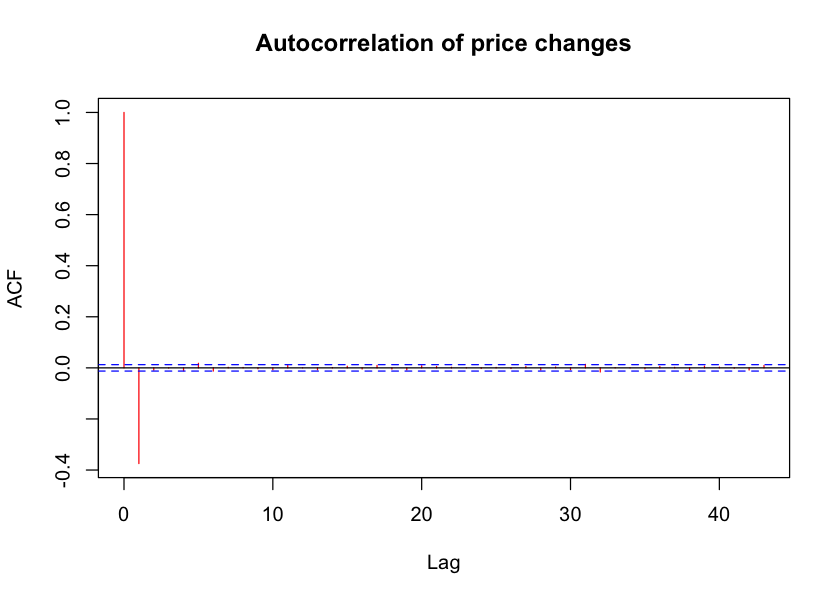

In [9]:
# autocorrelation of price changes
plot(ac, main="Autocorrelation of price changes", col="red")

### BAC signature plot

<span>BAC data from 19-Sep-2017.</span>

A *signature plot* is a plot of RV as a function of the sampling frequency $q$.

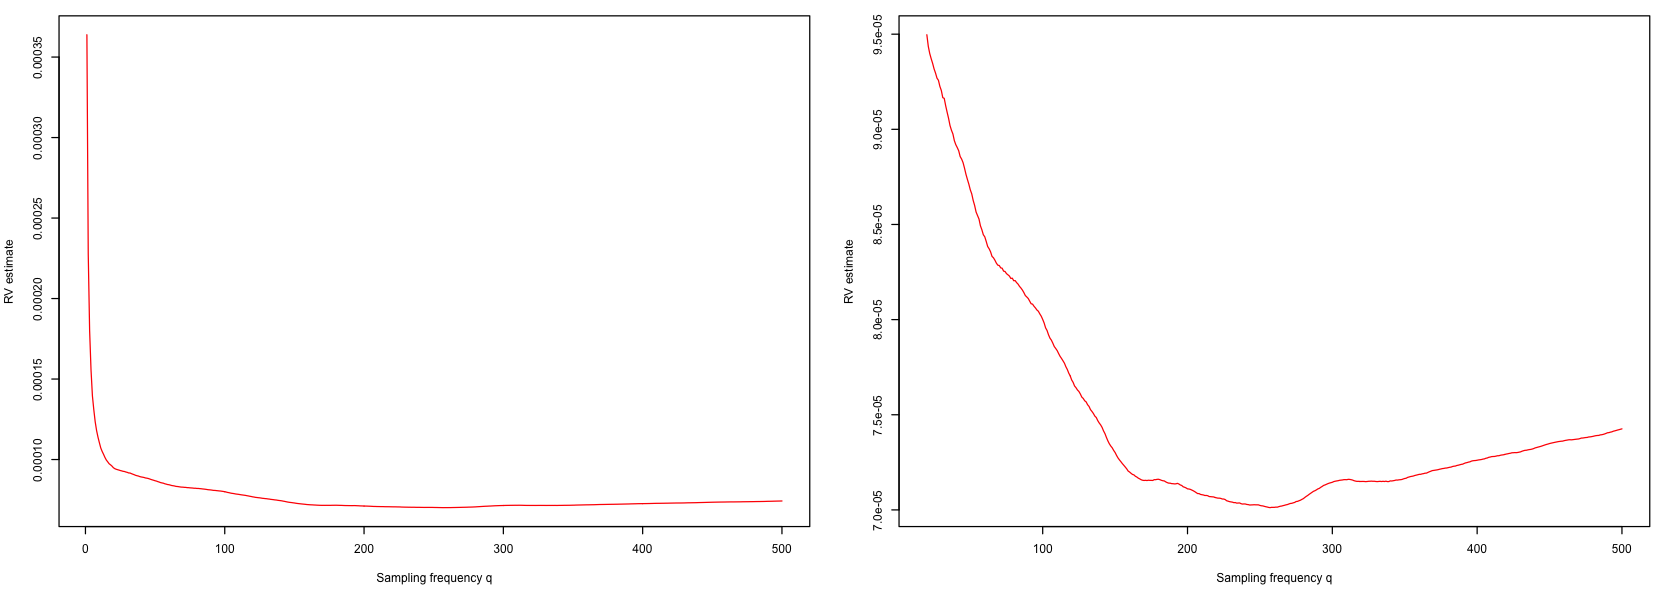

In [10]:
options(repr.plot.width=14)
nn <- 1000
rv <- sapply(1:nn, function(q){rCov(diff(log(p), lag=q))/q})
# The code above is in fact the boosted subsample RV estimator

# Signature plot
m <- 500
par(mfrow=c(1,2), cex=.6, mar=c(5,4,1,2)+.1)
plot(1:m, rv[1:m], col="red", type="l", ylab="RV estimate", xlab="Sampling frequency q")

# zoom into 20:m
plot(20:m, rv[20:m], col="red", type="l", ylab="RV estimate", xlab="Sampling frequency q")
par(mfrow=c(1,1))

### Oomen’s noise-to-signal ratio

Following Oomen, we define the noise-to-signal ratio:

$$\xi=\frac{\mbox{var}[\epsilon]}{\sigma^2}.$$ 

$\xi$ may be efficiently estimated using

$$\mbox{var}[\epsilon]\sim -\frac{1}{n-1}\,\sum_{i=1}^{n-1} \, \Delta Y_{t_{i+1}} \Delta Y_{t_i}$$

which is just the square of the half-spread in the Roll model.

#### Note
By using the asymptotic result, we can also estimate $\mbox{var}[\epsilon]$ by the consistent estimator $\frac1{2n}[Y]_T^\Pi$.


### The Roll model

Recall that in the Roll model, with

$$p_t = m_t + \epsilon_t = m_t + c \, e_t,$$

where $m_t$ is a martingale and $e_t$ is iid with mean $0$ and variance $1$, the effective half-spread is given by

$$c=\sqrt{-\gamma_1}$$ and
$$\sigma^2=\gamma_0+2\,\gamma_1$$



### Some features of the data

What was the volume?

In [11]:
sum(as.numeric(tqBAC$SIZE))

[1] 29531519

How many trades?

In [12]:
(n.trades <- dim(tqdata)[1])

[1] 24460

How many trades per 5 minutes in average?

In [13]:
n.trades*5/390

[1] 313.5897

### Roll estimate of volatility

In [14]:
res <- acf(dp, type="covariance", plot=F)
gam0 <- res$acf[1]
gam1 <- res$acf[2]

In [15]:
sig2 <- gam0 + 2*gam1

In [16]:
sqrt(sig2*n.trades)

[1] 0.009552098

In [17]:
sqrt(sig2*n.trades*252*1.4) # 1.4 factor for overnight moves

[1] 0.1794168

An annualized volatility of around $18\%$.

### The conventional solution

-   The conventional solution is to sample at most every five minutes or
    so.

    -   In our BAC dataset, there are 24,460 trades, roughly 314
        trades per 5 minutes.

    -   We get an annualized volatility of around $18\%$. Compare this
        with around $23\%$ both 1-month historical and implied
        respectively on 19-Sep-2017.

    -   Sampling only every 5 minutes corresponds to throwing out 99.7%
        of the points!

-   To quote [Zhang, Mykland and Aït-Sahalia]<sup id="cite_ref-ZMA" class="reference"><a href="#cite_note-ZMA">[9]</a></sup>, “It is difficult to accept
    that throwing away data, especially in such quantities, can be an
    optimal solution.”


-   From a more practical perspective, if we believe that volatility is
    time-varying, it makes sense to try and measure it from recent data
    over the last few minutes rather than from a whole day of trading.

### Asymptotics for subsamples

Let $\Pi'= \{0 \leq t_1' < \cdots < t'_{n'} \leq T\} \subset \Pi$ be a subsample of $\Pi$, $0 < n' \leq n$. The same aymptotics applies to subsamples as well. As $n' \to \infty$, we have

$$
[Y]^{\Pi'}_T \mathop{\approx}^{\mathcal L} \angl{X}_T + 2 \, n' \, \mbox{var}[\epsilon] + \sqrt{ 4 n' \Eof{\epsilon^4} + \frac{2T}{n'} \int_0^T \sigma_t^4 dt} \; Z,
$$

where $Z \sim N(0,1)$.

- One should not sample too frequent but not too infrequent (it increases the discretization error) either.
- Thus, a natural question to ask is: what is the optimal sampling frequency? Or equivalently, what is the optimal subsample size $n'$?

### Optimal sampling frequency

-   The optimal sampling frequency is such that MSE is minimized.

    -   As sampling frequency increases, the variance of the estimate of
        realized variance decreases but its bias typically increases.

    -   This optimal sampling frequency may be computed theoretically
        for various estimators of realized variance under idealized
        assumptions.

### Review: Mean-squared error of an estimator

-   Mean-squared error (MSE) of an estimator $\theta$ of some quantity
    $\theta$ is defined by:
    
    $$\text{MSE}[\hat \theta]=\mathbb{E} [(\hat \theta- \theta)^2]$$


-   Bias is given by $\mathbb{E} [\hat \theta -\theta]$.


-   Variance of the estimator is given by

    $$\mathbb{E} [(\hat \theta-\mathbb{E} [\hat \theta])^2]$$

-   Then
\begin{eqnarray*}
    \mbox{MSE}&=&\mathbb{E} [(\hat \theta- \mathbb{E} [\hat \theta]+\mathbb{E} [\hat \theta]-\theta)^2]\\
    &=&\mathbb{E} [(\hat \theta- \mathbb{E} [\hat \theta])^2]+(\mathbb{E} [\hat \theta-\theta])^2\\
    &=&\mbox{Variance} + \mbox{Bias}^2
\end{eqnarray*}

### Review: Consistency and efficiency

-   An estimator $\hat \theta$ is <span>*(asymptotically) consistent*</span> if it
    converges in probability to the true value $\theta$.

-   Estimator $A$ is more <span>*efficient*</span> than estimator $B$ if
    $\mathbb{E} [(A-\theta)^2]<\mathbb{E} [(B - \theta)^2]$, i.e., $A$ has smaller MSE.

-   An <span>*efficient*</span> estimator is the most efficient one.


-   An article in econometrics describing a new estimator typically
    proves that this new estimator is asymptotically consistent and
    efficient in the limit that the number of samples $n \to \infty$.
    - Assuming some specific process of course.

### Optimal subsample size

It is shown in [Zhang, Mykland and Aït-Sahalia]<sup id="cite_ref-ZMA" class="reference"><a href="#cite_note-ZMA">[9]</a></sup> that the optimal subsample size $n^*$ is given by 

$$
n^* = \sqrt[3]{\frac T{4\mbox{var}^2[\epsilon]} \int_0^T \sigma_t^4 dt}.
$$

### Subsampling

Let $\Pi^{(k)} = \{0 \leq t_0^{(k)} < \cdots < t_{n_k}^{(k)}\leq T\}$, for $1 \leq k \leq K$, be a collection of nonoverlapping subsampling times in $\Pi$. That is, 

$$
\bigcup_{k=1}^K \Pi^{(k)} = \Pi \quad \mbox{ and } \quad \Pi^{(k)} \cap \Pi^{(\ell)} = \emptyset \; \mbox{for } k \neq \ell.
$$

A typical example that we shall be using in the following is by sampling every $K$ ticks from the $k$th tick on. That is, 

\begin{eqnarray*}
&& \Pi^{(1)} = \{t_1 < t_{1+K} < t_{1 + 2K} < \cdots < t_{1 + n_1 K} \leq T \}, \\
&& \Pi^{(2)} = \{t_2 < t_{2+K} < t_{2 + 2K}< \cdots < t_{2 + n_2 K} \leq T \}, \\
&& \qquad \vdots \\
&& \Pi^{(K)} = \{t_0 < t_K < t_{2K}  < \cdots < t_{n_K K} \leq  T \}.
\end{eqnarray*}

We denote by $[Y]_T^{\Pi^{(k)}}$ the RV estimate of $Y$ using the subsamples that are sampled from the sampling times in $\Pi^{(k)}$, for $1 \leq k \leq K$.

By the same token, we have the following asymptotics for each subsample $k \in \{1, \cdots, K\}$

$$
[Y]^{\Pi^{(k)}}_T \mathop{\approx}^{\mathcal L} \angl{X}_T + 2 \, n_k \, \mbox{var}[\epsilon] + \sqrt{ 4 n_k \Eof{\epsilon^4} + \frac{2T}{n_k} \int_0^T \sigma_t^4 dt} \; Z_k
$$

where $Z_k \sim N(0,1)$.

### Boosting RV estimator

We can boost the RV estimator by averaging over the "weak learners" $[Y]_T^{\Pi^{(k)}}$

\begin{eqnarray*}
[Y]_T^{avg} &=& \frac{1}{K} \, \sum_{k=1}^K \, [Y]_T^{\Pi^{(k)}} \\
&\approx& \angl{X}_T + 2 \, \bar n_K \, \mbox{var}[\epsilon] + \sqrt{ 4 \frac{\bar n_K}K \Eof{\epsilon^4} + \frac{4T}{3 \bar n_K} \int_0^T \sigma_t^4 dt} \; Z
\end{eqnarray*}
    
where $\bar n_K := \frac1K \sum_k n_k $ is the average number of ticks in each subsample, roughly equal to $\frac nK$.


#### Note
- Boosting reduces biasedness and variance by a factor of $K$, but is unable to completely remove the biasedness.
- The optimal average subsample size $\bar n^*$ is given by
$$
\bar n^* = \sqrt[3]{\frac T{6\mbox{var}^2[\epsilon]} \int_0^T \sigma_t^4 dt}.
$$
    Thus, the whole sample set is splitted into roughly $K^* \approx \frac n{\bar n^*}$ sets of subsamples.

### The ZMA estimator

Recall that 

\begin{eqnarray*}
&& [Y]^\Pi_T \approx \angl{X}_T + n \, \mbox{var}[\epsilon], \\
&& [Y]^{avg}_T \approx \angl{X}_T + \bar n_K \mbox{var}[\epsilon].
\end{eqnarray*}

We can eliminate bias by forming

\begin{eqnarray*}
\frac1{\bar n_K}[Y]_T^{avg} - \frac1n \, [Y]_T^\Pi \approx \left( \frac1{\bar n_K} - \frac1n \right) \angl{X}_T.
\end{eqnarray*}

Thus we obtain the [Zhang, Mykland and Aït-Sahalia]<sup id="cite_ref-ZMA" class="reference"><a href="#cite_note-ZMA">[9]</a></sup> (ZMA) bias-corrected
estimator of $\angl{X}_T$:

$$
[Y]_T^{ZMA} := \frac{1}{n - \bar n_K} \, \left\{n \, [Y]_T^{avg} - \bar n_K \, [Y]^\Pi_T \right\}.
$$

Moreover, we have the asymptotic behavior for $[Y]_T^{ZMA}$ as

$$
[Y]_T^{ZMA} \approx \angl{X}_T + \frac1{\sqrt[6]n}\sqrt{\frac8{c^2}\mbox{var}^2[\epsilon] + c \frac{4T}3 \int_0^T \sigma_t^4 dt} \; Z
$$

where $Z \sim N(0,1)$. The optimal constant $c^*$ is given by

$$
c^* = \left(\frac T{12 \, \mbox{var}^2[\epsilon]} \int_0^T \sigma_t^4 dt \right)^{-\frac13}.
$$

#### Note
In the original paper [Zhang, Mykland and Aït-Sahalia]<sup id="cite_ref-ZMA" class="reference"><a href="#cite_note-ZMA">[9]</a></sup>, the authors suggested the estimator as $[Y]_T^{avg} - \frac{\bar n_K}{n}[Y]_T^\Pi$, whereas the estimator $[Y]_T^{ZMA}$ obtained above is referred to as the *small-sample adjustment* in the paper. 

### The Zhou estimator

Define

$$
\begin{eqnarray*}
[Y]_T^{\Pi, Z}: &=& \sum_{i=1}^n \, (\Delta Y_{t_i})^2
+ \sum_{i=2}^n \, \Delta Y_{t_i} \, \Delta Y_{t_{i-1}} + \sum_{i=1}^{n-1} \, \Delta Y_{t_i} \Delta Y_{t_{i+1}} \\
&=& \sum_{i=1}^n \,(Y_{t_i} - Y_{t_{i-1}})(Y_{t_{i+1}} - Y_{t_{i-2}}).
\end{eqnarray*}
$$
Thus, under the assumption $Y = X + \epsilon$ of serially uncorrelated
noise independent of returns $X$, we obtain
$\mathbb{E}\left[[Y]^{\Pi, Z}\right] = \Eof{[X]_T}$. 

By further assume $X_t = \sigma W_{\tau(t)}$ (a time-changed Brownian motion) for some Brownian motion $W$ and deterministic increasing function $\tau(\cdot)$, since 

$$
\Eof{(\Delta X_{t_i})^2} = \sigma^2 \Eof{\left\{ W_{\tau(t_i)} - W_{\tau(t_{i-1})} \right\}^2} = \sigma^2 \{\tau(t_i) - \tau(t_{i-1})\},
$$

we have

$$
\mathbb{E}\left[[Y]^{\Pi, Z}\right] = \sigma^2 \{\tau(T) - \tau(0) \} = \angl{X}_T.
$$

In other words, in this case $[Y]^{\Pi, Z}$ is an unbiased estimator of $\angl{X}_T$.


### Boosting Zhou estimator

As suggested by [Zhou]<sup id="cite_ref-Zhou" class="reference"><a href="#cite_note-Zhou">[9]</a></sup> himself, we may boost the Zhou estimator from
subsamples of the data obtaining

$$[Y]^{avg, Z} := \frac{1}K \, \sum_{k=1}^K [Y]^{\Pi^{(k)}, Z}$$



### Notation

-   Given an observed log price series $\{p_i\}_{i=0}^T$, let

    <a name="Eqn:gamma"></a>(1)
    $$\gamma_{h,q}(k) = \sum_{i=1}^{m} (p_{iq+h}-p_{(i-1)q+h})(p_{(i+k)q+h}-p_{(i-1+k)q+h}),$$

    where $m = \lfloor (T-h+1)/q\rfloor-k$.

    -   Thus $q$ is the sub-sampling frequency, $h$ is the index of a
        given subsample and $k$ is a time-offset.  $\gamma_{h,q}(k) $ is the $k$th realized autocovariance of the subsampled series.

### Zhou and ZMA estimators in updated notation

With our updated notation:

-   The Zhou estimator becomes

    <a name="Eqn:ZHOU"></a>(2)    
    $$ZHOU = \frac1q \sum_{h = 0}^{q-1} (\gamma_{h,q}(0)+2\gamma_{h,q}(1))$$


-   The ZMA (or two-scale RV) estimator becomes:

    <a name="Eqn:TSRV"></a>(3)
    $$TSRV=\left( 1-\overline{T}/T\right) ^{-1}\left( \frac{1}{q}\sum_{h = 0}^{q-1}\gamma
    _{h,q}(0)-\frac{\overline{T}}{T}\gamma_{0,1}(0)\right),$$

    where $\overline{T} =(T-q+1)/q$

### Multiscale RV

Zhang’s multiscale RV estimator is given by

<a name="Eqn:MSRV"></a>(4)
$$MSRV = \sum_{j = 1}^{q} \frac{a_j}{j} \sum_{h = 0}^{j-1}\gamma_{h,j}(0),$$

where

$$a_j^\ast = (1-1/q^2)^{-1}\left(\frac{j}{q^2}h(j/q)-\frac{j}{2q^3}h^\prime(j/q)\right)$$

and $$h(x) =12\,(x-1/2).$$



### Realized Kernel estimator of Barndorff-Nielsen, Hansen, Lunde and Shephard

<a name="Eqn:KRV"></a>(5)
$$KRV = \gamma_{0,1}(0)+2\sum_{s = 1}^k \kappa\left(\frac{s-1}{k}\right)\gamma_{0,1}(s).$$

Choices for the kernel $\kappa(x)$ include:

-   Modified Tukey-Hanning kernel TH$_{2}$: $\kappa\left( x\right)
    =\sin ^{2}\left\{\frac{\pi }{2}\left( 1-x\right) ^2\right\}$.

-   Cubic kernel: $\kappa\left( x\right)
    =1-3x^{2}+2x^{3}$.

Both of these are so-called *flat-topped* kernels where the coefficient of first order autocovariance is $1$.  KRV estimators are designed to maximize efficiency.  However, their derivation assumes independent noise.

### Large’s alternation estimator


<a name="Eqn:ALT"></a>(6)
$$ALT = \frac{C}{R}\,\gamma_{0,1}(0),$$

where $R$ ($C$) are the number of reversals (continuations) in the
sample.

-   Note that $C =
    \sum_{i=2}^{T} (I^p_i I^p_{i-1}+I^n_{i-1} I^n_i)$ and
    $R = \sum_{i=2}^{T}( I^p_i
    I^n_{i-1}+I^p_{i-1} I^n_i)$ where $I^p_i = \1_{\{r_i > 0\}}$ and
    $I^n_i = \1_{\{r_i < 0\}}$.

-   If there are zero returns in the sample then these are first
    removed, *i.e.*, the estimator is implemented using tick
    data.



### Large’s estimator


-   Note once again that 
    $$\gamma_{0,1}(0)=\sum_t\,\Delta p_t^2
   $$
    which is just $RV$. So 
    
    $$ALT = \frac{C}{R}\,RV.$$

-   If the efficient price is constant, then $C=0$ and $ALT=0$.


-   If there is no microstructure noise, $C=R$ for a random walk and $ALT=RV$.


-   This estimator only works for large tick markets where the price
    moves by only one tick whenever it moves.

### Maximum Likelihood estimator of Aït-Sahalia, Mykland and Zhang

<a name="Eqn:MLRV"></a>(7)
$$MLRV =  M\,\widehat{\delta}^2\,(1+\widehat{\eta})^2,$$

where $(\widehat{\eta},\widehat{\delta^2})$ are the maximum likelihood
estimates of an MA(1) model for observed returns, <span>*i.e.*</span>
$r_i = \varepsilon_i+\eta \varepsilon_{i-1}$ where the $\varepsilon_i$’s
are serially uncorrelated with mean zero and variance $\delta^2$.



### Practical implementation

-   Ideally, we should be able to update a RV estimator in real time as
    ticks come in.
    - An *online algorithm* in computer science terminology.

-   From this perspective, estimators where we can just add the most
    recent observation and drop the oldest observation are preferred.



### Convergence of TSRV, MSRV and kernel estimators

-   The TSRV (two-timescale RV) measure yields a consistent estimator of
    IV that converges at rate $M^{-1/6}$.

-   The rate of the TSRV estimator can be improved to $M^{-1/4}$ – the
    fastest attainable in this setting – by using multiple time scales
    as in the MSRV.

-   The realized kernels provide an equally efficient alternative to the
    subsampling estimators with rates of convergence of $M^{-1/6}$ or
    $M^{-1/4}$ depending on the choice of kernel (the TH$_{2}$ and cubic
    kernels converge at the fastest rate).
    

-   Finally, both the ALT and MLRV estimators are also consistent and
    converge at rate $M^{-1/4}$, albeit under more restrictive (semi-)
    parametric assumptions.


-   An important feature of the non-parametric RV measures TSRV, MSRV,
    and KRV is that they allow for stochastic volatility, leverage and
    can be made robust to dependent noise.

    -   ZHOU is biased with dependent noise

    -   ALT rules out leverage effects and requires uncorrelated noise

    -   Although MLRV can be modified to take account of dependent noise
        it does not allow for stochastic volatility.

### Using the mid-quote

-   What if quote data is available?


-   According to practitioners, using mid-quotes eliminates bid-ask
    bounce.

    -   If we use mid-quotes, do we get the same volatility estimate?

    -   When should we sample the mid-quotes? Every quote change? Every
        second?

-   According to Bouchaud, Gefen, Potters and Wyart(2004) and also Bandi 
    and Russell (2006), it's best to sample the mid-quote just before each 
    trade.


-   Let’s see how the autocorrelation plot and noise plot look with
    mid-quotes.

### BAC trades and quotes

In [18]:
bid <- as.numeric(tqBAC$BID)
ask <- as.numeric(tqBAC$OFR)
mid <- (bid + ask)/2

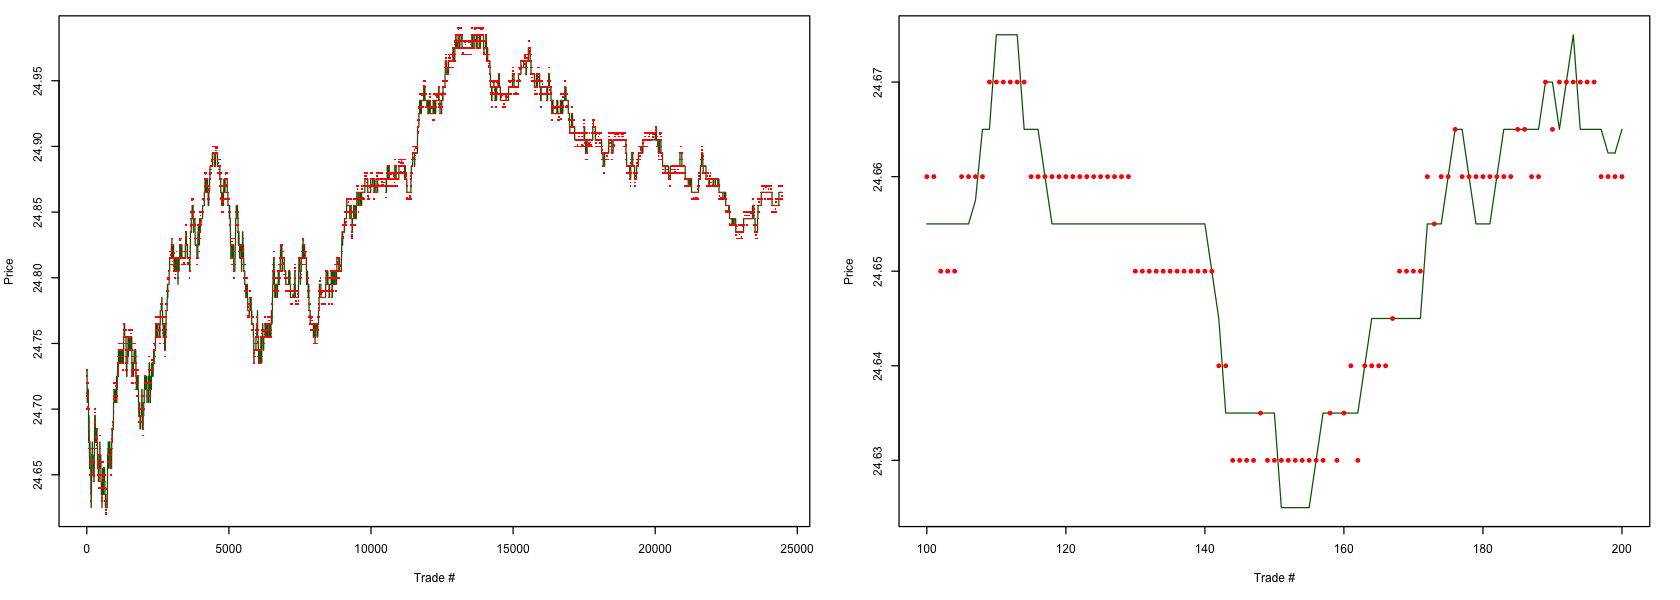

In [19]:
par(mfrow=c(1,2),mar=c(5,4,1,2)+.1,cex=.6)
plot(mid,col="dark green",type="l",ylab="Price",xlab="Trade #")
points(p,col="red",type="p",pch=".")
plot(100:200,mid[100:200],col="dark green",type="l",ylab="Price",xlab="Trade #")
points(100:200,p[100:200],col="red",type="p",pch=20)
par(mfrow=c(1,1))

<span>BAC data from 19-Sep-2017. Mid-quotes in green, trade prices in
red.</span>

### Autocorrelation of BAC mid-quote changes

<span>BAC data from 19-Sep-2017.</span>

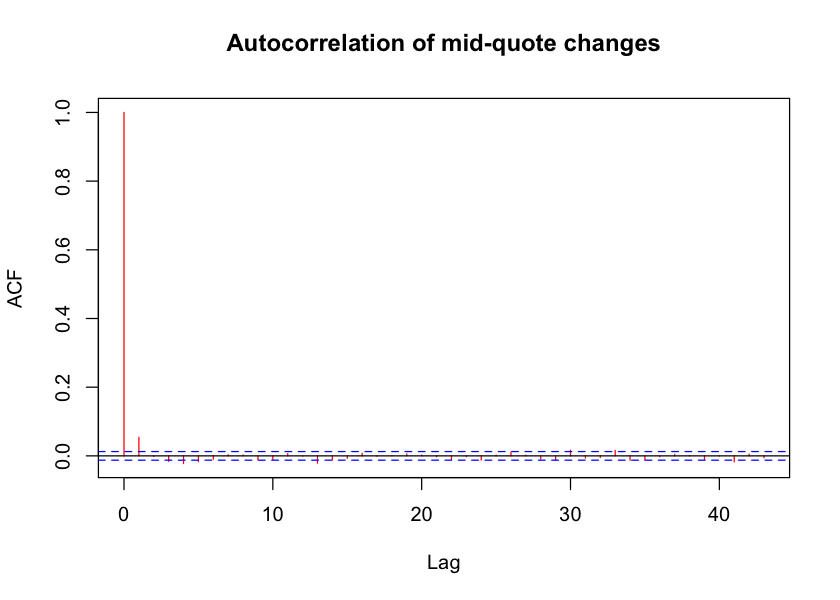

In [20]:
# Plot autocorrelation function of mid-quote changes
options(repr.plot.width=7)
dm <- diff(log(mid))
acm <- acf(dm, plot=F)
plot(acm, main="Autocorrelation of mid-quote changes", col="red")

-   Much less autocorrelation in the mid-quote data.

### BAC signature plot using mid-prices

Using BAC mid-price data, we again plot RV as function of sampling frequency $q$.

In [21]:
nn <- 10000
rvm <- sapply(1:nn, function(q){rCov(diff(log(mid), lag=q))/q})

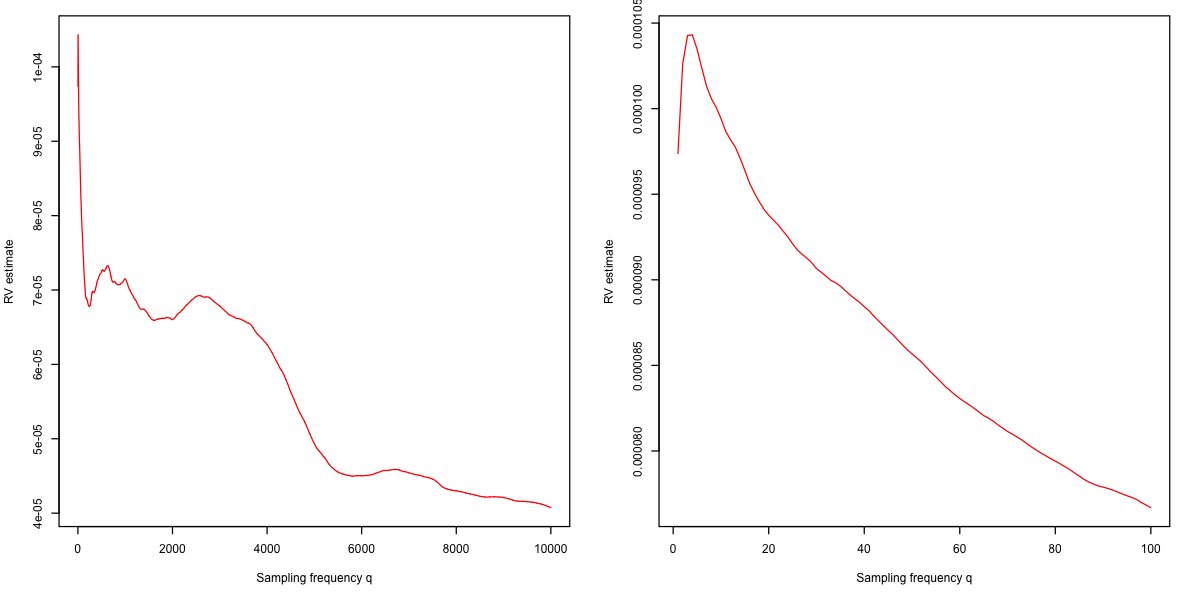

In [22]:
options(repr.plot.width=10)
par(mfrow=c(1,2), cex=.6,mar=c(5,4,1,2)+.1)
plot(1:nn, rvm,col="red", type="l", ylab="RV estimate", xlab="Sampling frequency q")
plot(1:100, rvm[1:100], col="red", type="l", ylab="RV estimate", 
     xlab="Sampling frequency q")
par(mfrow=c(1,1))

### ZI simulation

-   Given a set of tick data, what was the realized variance?


-   If we don’t know what the true value was, how can we test the
    performance of different estimators?

    -   One way is to simulate from a model which could be stochastic
        volatility or jump-diffusion for example.

    -   A noise process is typically added to the efficient price
        process.

-   [Gatheral and Oomen]<sup id="cite_ref-GatheralOomen" class="reference"><a href="#cite_note-GatheralOomen"><span>[</span>5<span>]</span></a></sup> generated simulations from the Smith Farmer
    zero-intelligence (ZI) model. This has the benefit that
    microstructure noise is in some sense much more realistically
    modeled.


-   We tested many different estimators and came up with a ranking.

### Gatheral Oomen results for mid-quotes

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/ziResults12.png" align = "center" width=1200></h2>

### Conclusion of the ZI simulation: Which estimators are best?

-   Sample prices at the highest available frequency and then measure
    realized variance using one of:

    -   The Two-Scale ZMA estimator with a subsampling frequency of 5,

    -   The Multi-Scale RV of Zhang with 5 subsamples,

    -   The Realized Kernel of BNS with a bandwidth of 5.


-   The performance of these estimators is largely equivalent and their
    implementation equally straightforward, so which particular one to
    use would be a matter of taste.

-   Relative to the widely used sum of sparsely sampled returns
    following the “5-minute” rule prescribed in earlier literature, the
    efficiency gain achieved with these is likely to be substantial.

### Conclusion of the ZI simulation: What series to sample?

-   In terms of data sampling, use mid-quotes.


-   When sampled immediately prior to a trade, we ensure the same number
    of observations as for the trade data but with a heavily reduced
    level of microstructure noise.


-   The micro price is also preferred over the trade data but, despite
    some seemingly appealing features, does not seem to improve over
    mid-quote data. At least in the ZI simulation, it appears that
    micro-price had higher order autocorrelations.



### Conclusion of the ZI simulation: What bandwidth to use?

-   The rule for choosing $q$ should be to let $q$ grow with the level
    of noise so that with little noise we compute something that is
    close to RV and with high levels of noise we effectively reduce the
    sampling frequency so as to mitigate its impact.


-   The optimal bandwidth $q^\ast$ can be computed in closed-form for
    realized kernels, TSRV and MSRV. It is of the form:
    
    $$q^{\ast }=A\,\sqrt{\xi}.$$
    
    for some estimator-dependent constant
    $A$ where $\xi$ is the Oomen noise-to-signal ratio.


-   Alternatively, $q=5$ seems to work well nearly all of the time.



### Trades vs mid-quotes

-   [Barndorff-Nielsen et al.]<sup id="cite_ref-BNS" class="reference"><a href="#cite_note-BNS"><span>[</span>1<span>]</span></a></sup> point out that one way to assess the performance of an
    estimator on real data is to see if it gives the same result on
    trades and quotes.

    -   They find that results depend on the data-cleaning protocol
        followed.

    -   It’s better to take data from each exchange separately and
        average the results rather than supposing that all data comes
        from the same source.

 -   This might be less true now post Reg. NMS (Regulation National Market System).

 -   The realized kernel estimators do fine, giving similar results
        for trades and quotes.

 -   There are some days with lengthy strong trends which are not
        compatible with standard models of microstructure noise.

### Estimates of realized variance of BAC data



#### Estimates from trade data

In [23]:
RV1 <- RVplain(log(p), 1)*sqrt(n.trades)
RV314 <- RVplain(log(p), 314)*sqrt(n.trades)  # Roughly 5 minutes
TS5 <- TSRV(log(p), 5)*sqrt(n.trades)
MS5 <- MSRV(log(p), 5)*sqrt(n.trades)
KTH5 <- KRVTH(log(p), 5)*sqrt(n.trades)
KC5 <- KRVC(log(p), 5)*sqrt(n.trades)

data.frame(RV1, RV314, TS5, MS5, KTH5, KC5)

RV1,RV314,TS5,MS5,KTH5,KC5
0.0569063,0.009852493,0.01304519,0.01305223,0.01344506,0.01305842


#### Estimates from mid-quote data

In [24]:
RV1 <- RVplain(log(mid),1)*sqrt(n.trades)
RV314 <- RVplain(log(mid),314)*sqrt(n.trades)
TS5 <- TSRV(log(mid),5)*sqrt(n.trades)
MS5 <- MSRV(log(mid),5)*sqrt(n.trades)
KTH5 <- KRVTH(log(mid),5)*sqrt(n.trades)
KC5 <- KRVC(log(mid),5)*sqrt(n.trades)

data.frame(RV1, RV314, TS5, MS5, KTH5, KC5)

RV1,RV314,TS5,MS5,KTH5,KC5
0.01522992,0.01039115,0.01642153,0.01645283,0.01665178,0.0162197


### BAC volume profile

Using BAC size data, we plot the volume profile.

In [25]:
ep <- endpoints(tqBAC,'minutes', k=1)
ne <- length(ep)
ep <- ep[-ne]
sz <- function(x){mean(as.numeric(x$SIZE))}
szVec <- period.apply(tqBAC, INDEX=ep, FUN= sz)
ns <- length(szVec)

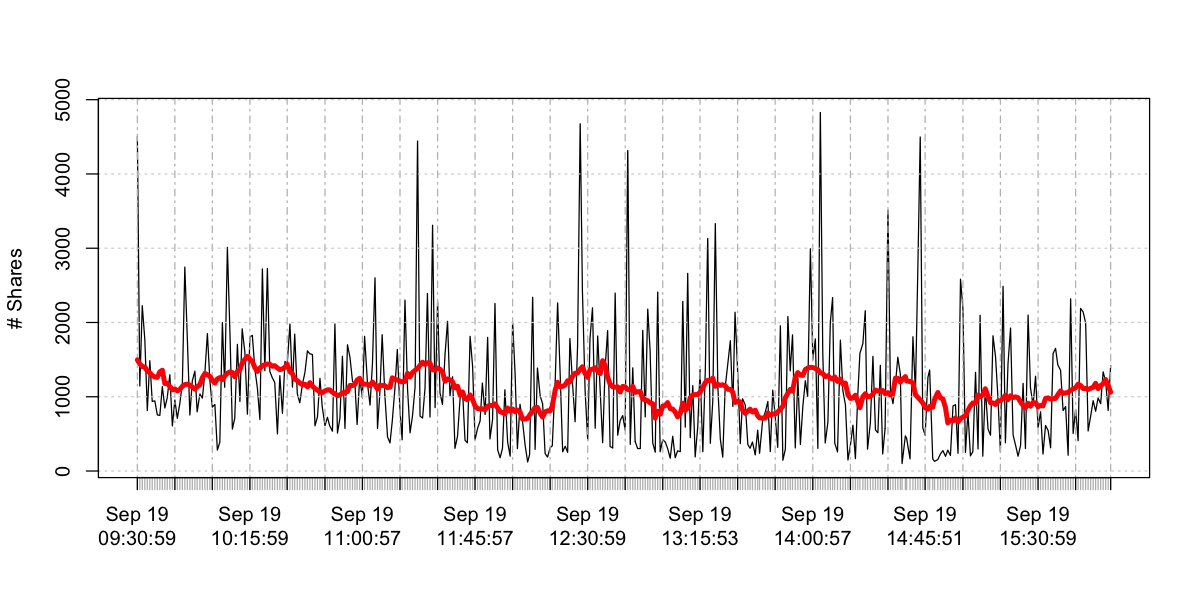

In [105]:
plot(szVec, ylab = "# Shares", main=NA)
ks <- ksmooth(1:ns,szVec, bandwidth=20)$y
sz2 <- as.xts(cbind(szVec,ks))
names(sz2) <- c("SIZE", "kSIZE")
lines(sz2$kSIZE,col="red",lwd=4)

-   <span>The red line is kernel-smoothed volume</span>

### BAC volume and realized variance profiles

Using the same data, we compute realized variance from mid-quotes with the Tukey Hanning kernel ($q=5$) (KRV).

In [58]:
rv <- function(x){
    mid <- (as.numeric(x$BID) + as.numeric(x$OFR))/2
  
    KRVTH(mid, 5)
}
sz <- function(x){mean(as.numeric(x$SIZE))}

ep <- endpoints(tqBAC, 'minutes', k=5)
ep <- ep[-length(ep)]
szVec <- period.apply(tqBAC, INDEX=ep, FUN=sz)
rvVec <- period.apply(tqBAC, INDEX=ep, FUN=rv)

Now, we show the volume and RV plots together.

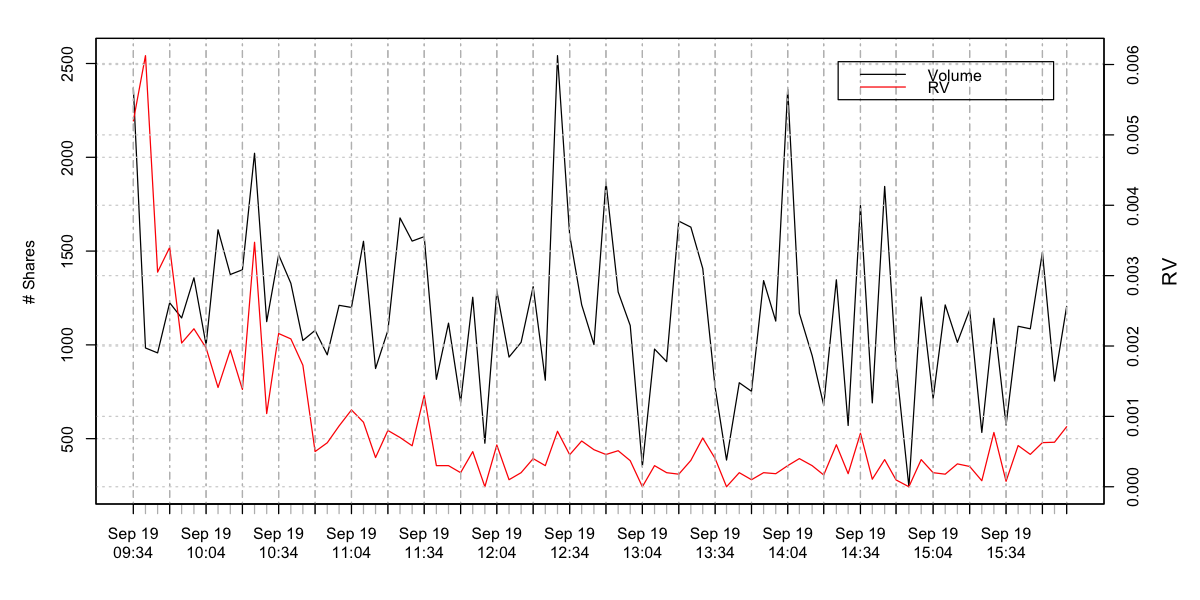

In [59]:
par(mar = c(5,5,2,5),cex=0.8)
plot(szVec, ylab="# Shares",  main=NA)
par(new = T)
plot(rvVec, col="red", axes=F, xlab=NA, ylab=NA, main=NA)
axis(side=4)
mtext(side=4, line=3, "RV")
legend("topright", inset=0.05, legend=c("Volume    ","RV"), col=c("black","red"),
       lwd=c(1,1))

-   <span>The red line is kernel-smoothed volume; the black line is KRV.</span>

### Estimating covariance

-   The natural estimator of covariance is just

    $$\frac{1}{T}\,\sum_{i=1}^T\,\Delta p^{(1)}_i\,\Delta p^{(2)}_i$$
    
    where $p^{(1)}$ and $p^{(2)}$ are prices of two assets.

-   However the prices $p^{(i)}$ are usually asynchronous.

-   Consequently, this estimator decreases as sampling frequency
    increases.
    -   In fact, [Hayashi and Yoshida]<sup id="cite_ref-HayashiYoshida" class="reference"><a href="#cite_note-HayashiYoshida"><span>[</span>6<span>]</span></a></sup> show under pretty innocuous assumptions
        that it tends to zero as sampling frequency increases.

-   This is called the <span>*Epps Effect*</span>.

### The Hayashi-Yoshida estimator

$$HY_t=\sum_{i \leq t}\,\sum_{j \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\,v_{ij}$$
where

$$v_{ij}={\bf 1}_{[t_{i-1},t_i] \cap [t_{j-1},t_j] \neq \emptyset}$$

In
words, the sum is over all overlapping intervals.



### How does Hayashi-Yoshida work?

Suppose
$$
\begin{eqnarray*}
dp^{(1)}_t&=&\sigma_1\,dZ_1\\
dp^{(2)}_t&=&\sigma_2\,dZ_2\end{eqnarray*}
$$

with $\mathbb{E} [dZ_1\,dZ_2]=\rho\,dt$. Then

$$
\begin{eqnarray*}
\mathbb{E} \left[(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\right]
&=&\mathbb{E} \left[\int_{t_{i-1}}^{t_i}\,\sigma_1\,dZ_1\,\int_{t_{j-1}}^{t_j}\,\sigma_2\,dZ_2\right] 
\\&=& \int_{[t_{i-1},t_i] \cap [t_{j-1},t_j] } \, \Eof{\rho\,\sigma_1\,\sigma_2} \,dt.
\end{eqnarray*}
$$

Summing over all partitions of the interval $[0,T]$ gives the result.

### Volatility forecasting

- It is by now well established that volatility forecasts are substantially improved by using accurate estimates of realized variance.


- We now briefly review two of the best performing estimators:

    - The HAR-RV (Heterogeneous
    Autoregressive Realized Variance) estimator of [Corsi]<sup id="cite_ref-Corsi" class="reference"><a href="#cite_note-Corsi"><span>[</span>2<span>]</span></a></sup>.
    - The Rough Volatility estimator of [Gatheral, Jaisson and Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>4<span>]</span></a></sup>.
    

### The Corsi HAR-RV forecast

-   The package `highfrequency` implements a regression to
    fit the parameters HAR-RV.


-   This model can be regarded as a poor man’s version of a long memory
    model such as ARFIMA.

    -   True long-memory models such as ARFIMA are notoriously hard to
        fit.


-   HAR-RV can also be considered an intelligent alternative to GARCH.

-   The model boils down to the regression

    $$RV_{t,t+h} = \beta_0 + \beta_D\,RV_t + \beta_W\,RV_{t-5,t} + \beta_M\,RV_{t-22,t} + \epsilon_{t,t+h}.$$
    
    In words, the RV forecast for $h$ days from now is a linear
    combination of the current realized variance and (aggregate) RV
    estimates for the last week and the last month.

### Example 

In [107]:
# Forecasting daily Realized volatility for DJI 2008 using the basic harModel: HAR-RV

data(realized_library); # Get sample daily Realized Volatility data
DJI_RV <- realized_library$Dow.Jones.Industrials.Realized.Variance; #Select DJI
DJI_RV <- DJI_RV[!is.na(DJI_RV)] #Remove NA's
DJI_RV <- DJI_RV['2008']

x <- harModel(data=DJI_RV, periods=c(1,5,22), RVest=c("rCov"), type="HARRV", h=1,
              transform=NULL)

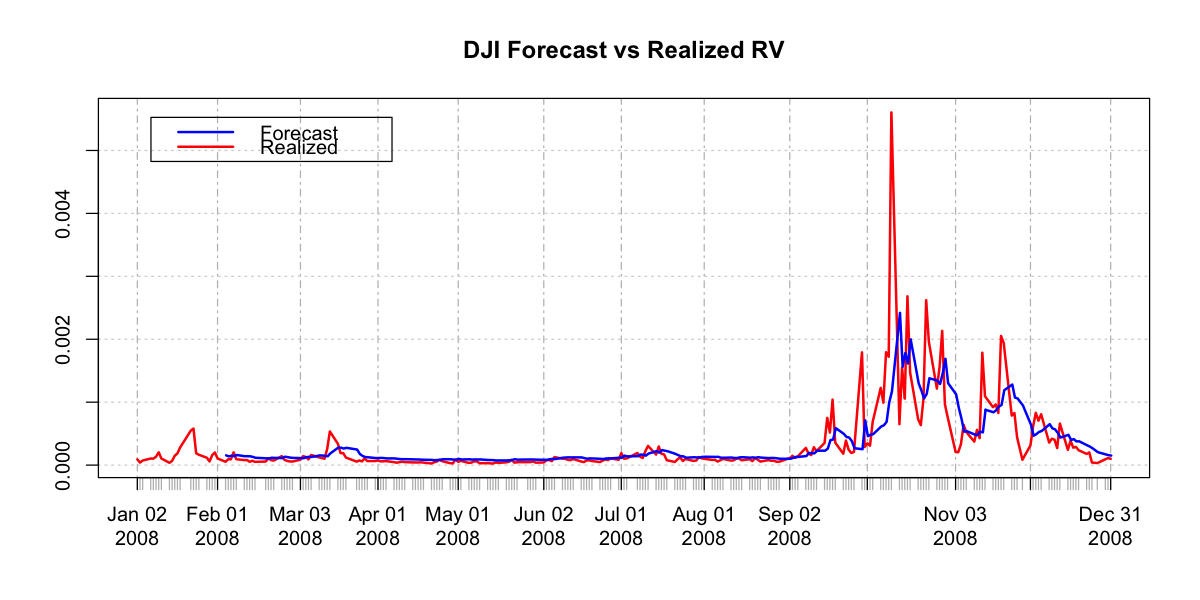

In [108]:
plot.xts(DJI_RV,type="n", main="DJI Forecast vs Realized RV")
lines(DJI_RV, col="red", lwd=2)
lines(as.xts(x$fitted.values), col="blue", lwd=2)
legend("topleft", inset=0.05, legend=c("Forecast", "Realized"), col=c("blue","red"),
       lwd=c(2, 2))

In [62]:
print(summary(x))


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0017683 -0.0000626 -0.0000427 -0.0000087  0.0044331 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 4.432e-05  3.695e-05   1.200   0.2315    
beta1 1.586e-01  8.089e-02   1.960   0.0512 .  
beta2 6.213e-01  1.362e-01   4.560 8.36e-06 ***
beta3 8.721e-02  1.217e-01   0.716   0.4745    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0004344 on 227 degrees of freedom
Multiple R-squared:  0.4679,	Adjusted R-squared:  0.4608 
F-statistic: 66.53 on 3 and 227 DF,  p-value: < 2.2e-16



### The Rough Volatility forecast
 

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
Variance forecast formula</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>

<a name="eq:vForecast"></a>(3)
$$
\eef{v_{t+\Delta}}=\exp\left\{\eef{\log(v_{t+\Delta})}+2\, c\,\nu^2\Delta^{2\,H}\right\}
%\label{eq:vForecast}
$$

<br>

</div>

</blockquote>

where 

$$
\beas
&&\eef{\log v_{t+\Delta}}\\
&&= \frac{\cos(H\pi)}{\pi} \Delta^{H+1/2} \int_{-\infty}^t \frac{\log v_s}{(t-s+\Delta)(t-s)^{H+1/2}} ds.
\eeas
$$

### HAR and rough volatility forecasts

The HAR forecast looks like
$$
\beas
\widehat{\log RV} &=& \sum_{j=1}^3\,\beta_j\,\int_{-t-\Delta_j}^t\,\log v_s\, ds\\
&=& \int_{-\infty}^t\,\kappa(t-s)\,\log v_s\, ds
\eeas
$$
with
$$
\kappa(\tau)=\beta_0+ \sum_{j=1}^3\,\beta_j\,\mathbb{1}_{\tau \leq \Delta_j}.
$$

The rough volatility forecast looks (up to a factor) like
$$
\beas
\widehat{\log RV} = \int_{-\infty}^t\,\kappa(t-s)\,\log v_s\, ds
\eeas
$$
with
$$
\kappa(\tau)=\frac{1}{(t-s+\Delta)(t-s)^{H+1/2}}.
$$

The HAR kernel looks like a piecewise constant approximation to the rough volatility kernel.

In [109]:
kappa.HAR.raw <- function(tau){
    vec <- (tau <= c(1,5,22))
    x$coefficients[2:4] %*% vec
}

kappa.HAR <- Vectorize(kappa.HAR.raw)

kappa.Rough <- function(tau){
    H <- 0.05
    cos(H*pi)/(H*pi)/((tau+1)*tau^(.5+H))}

### Graphical comparison of kernels

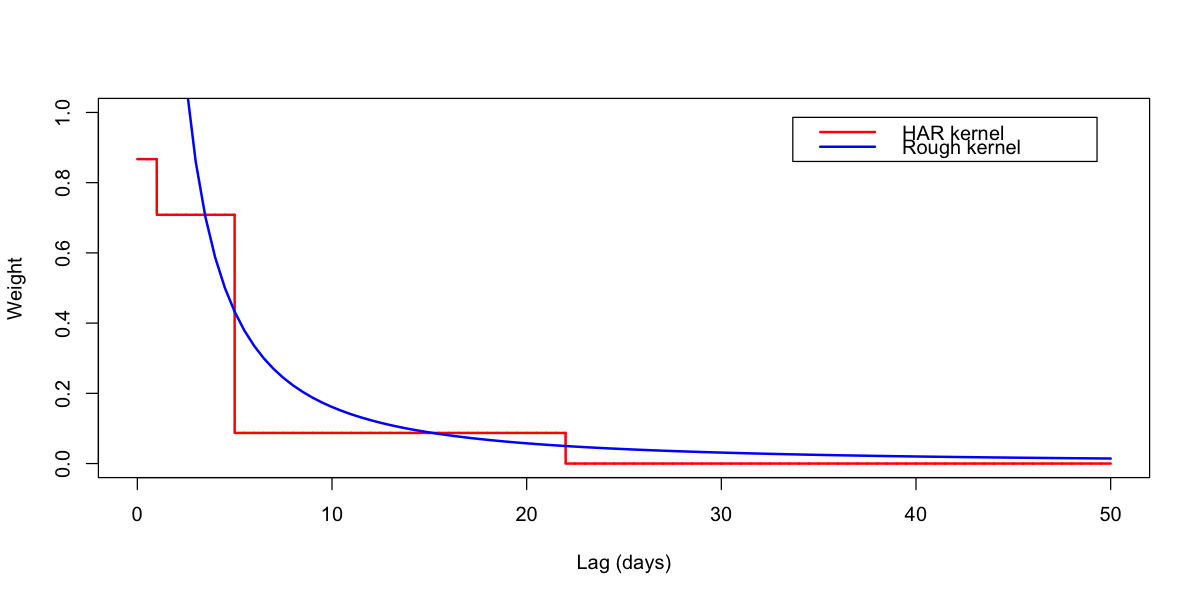

In [110]:
curve(kappa.HAR,from=0,to=50,col="red",lwd=2,n=10000,xlab="Lag (days)",ylab="Weight",ylim=c(0,1))
curve(kappa.Rough, from=0,to=50,col="blue",lwd=2,add=T)
legend("topright",inset=0.05,legend=c("HAR kernel","Rough kernel"),col=c("red","blue"),lwd=c(2,2))

### VolX

- The commercial company VolX (http://volx.us) has developed a number of RealVol Instruments and RealVol Indices based on realized volatility as defined by the RealVol Formulas.
    - Their business model is to license these indices to exchanges and information providers.


- They publish daily forecasts of RV using HARK (which is HAR-RV with Kalman filtering, and RVOL, an implementation of the Rough Volatility forecast.


- You can compare forecast versus actual volatility for the two estimators here: http://www.volx.us/volatilitycharts.shtml?2&SPY&PRED.

### VolX screenshots


<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/03/RVOL.png" align = "center" width=900></h2>

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/03/RVOLdist.png" align = "center" width=900></h2>
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/03/HVOLdist.png" align = "center" width=900></h2>

### RV data from the Oxford-Man Institute

-   In principle, it is straightforward to compute RV every day for any
    given underlying using one of the better RV estimators we presented
    above.


-   In practice, this involves a lot of data work, especially cleaning.

-   The R-package `highfrequency` has some historical RV
    data sourced from the Oxford-Man Institute of Quantitative Finance
    Realized Library.

    -   More such data is publicly available at
        <http://realized.oxford-man.ox.ac.uk>.

        -   In particular, various historical RV estimates for SPX are
            available.

        -   Data is updated daily.

### Conditional and unconditional variances

- The HAR and rough volatility forecasts are both impressive.
    - Much superior to alternatives such as GARCH.
    
    
    
- However, HAR is a regression and rough volatility is a proper model.


- One practical consequence is that we can put error bars on our volatility forecasts.

### So how good is the forecast?

Specifically, by how much is the variance of the future variance reduced by taking into account the whole history  of the fBm?
- In practice of course, we only consider some finite history, 200 points say.

- We know this again from <span>[Nuzman and Poor]<sup id="cite_ref-NuzmanPoor" class="reference"><a href="#cite_note-NuzmanPoor"><span>[</span>10<span>]</span></a></sup> who showed that the ratio of the conditional to the unconditional variance of the $\log v_t$ is

$$
\tilde c = \frac{\Gamma(3/2-H)}{\Gamma(H+1/2)\,\Gamma(2-2H)}.
$$


- We can compute this ratio empirically and compare with the model prediction.

### Unconditional and conditional variance vs lag $\Delta$

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/03/ConditionalVsUnconditionalVariance.png" align = "center" width=900></h2>



Actual unconditional variance in blue, rough volatility prediction in red; Actual conditional variance in green, rough volatility prediction in orange.

### Amazing agreement between data and model

- We observe that the ratio of conditional to unconditional variance is more or less *exactly* as predicted by the model!

### Summary

-   There has been a huge expansion in the literature on realized
    variance and covariance estimation since around 2003 with many very
    interesting papers.


-   As a result, we now have very efficient estimators for realized
    variance that take into account all of the available information.

    -   The newer volatility estimators are all very much more efficient
        that RV sampled every 5 minutes.

    -   Moreover, kernel-based estimators are easily updated in real
        time by adding the most recent tick and dropping the oldest
        tick.
        

- The article by [McAleer and Medeiros]<sup id="cite_ref-McAleerMedeiros" class="reference"><a href="#cite_note-McAleerMedeiros"><span>[</span>7<span>]</span></a></sup>  is a nice review of the literature up to 2008 or so. 


- The rough volatility forecast seems to be the simplest and best!


### References
<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-BNS"><span class="mw-cite-backlink"><b><a href="#cite_ref-BNS">^</a></b></span>O.E Barndorff-Nielsen, P.R Hansen, A Lunde, N
Shephard, Realized kernels in practice: Trades and quotes,
<span>*Econometrics Journal*</span> <span>**12 (3)**</span> 1–32 (2009).
  </li>
  
  <li id="cite_note-Corsi"><span class="mw-cite-backlink"><b><a href="#cite_ref-Corsi">^</a></b></span>Fulvio Corsi, A simple approximate long-memory model of realized
volatility, <span>*Journal of Financial Econometrics*</span>
<span>**7**</span>(2) 174–196 (2009). </li>

  <li id="cite_note-DR"><span class="mw-cite-backlink"><b><a href="#cite_ref-DR">^</a></b> Khalil Dayri and Mathieu Rosenbaum, Large Tick Assets: Implicit Spread and Optimal Tick Size, *Market Microstructure and Liquidity* **1**(1) 1550003, (2015).</li>

  <li id="cite_note-GJR"><span class="mw-cite-backlink"><b><a href="#cite_ref-GJR">^</a></b> Jim Gatheral, Thibault Jaisson and Mathieu Rosenbaum, Volatility is rough, available at http://papers.ssrn.com/sol3/papers.cfm?abstract_id=2509457, (2014).</li>  

  <li id="cite_note-GatheralOomen"><span class="mw-cite-backlink"><b><a href="#cite_ref-GatheralOomen">^</a></b></span>Jim Gatheral and Roel C. A Oomen, Zero-intelligence
realized variance estimation, <span>*Finance and Stochastics
*</span><span>**14**</span>(2) 249–283 (2010).
  </li>

  <li id="cite_note-HayashiYoshida"><span class="mw-cite-backlink"><b><a href="#cite_ref-HayashiYoshida">^</a></b></span>Takaki Hayashi and Nakahiro Yoshida, On covariance
estimation of non-synchronously observed diffusion processes,
<span>*Bernoulli *</span><span>**11**</span>(2) 359–379 (2005).
  </li>
  
  <li id="cite_note-McAleerMedeiros"><span class="mw-cite-backlink"><b><a href="#cite_ref-McAleerMedeiros">^</a></b></span>Michael McAleer and Marcelo C. Medeiros, Realized Volatility: A Review, <span>*Econometric Reviews*</span>
<span>**27**</span>(1) 10–45 (2008).
  </li>
  
  <li id="cite_note-RobertRosenbaum"><span class="mw-cite-backlink"><b><a href="#cite_ref-RobertRosenbaum">^</a></b></span>Christian Y. Robert and Mathieu Rosenbaum, Volatility and covariation estimation when microstructure noise and
trading times are endogenous, <span>*Mathematical Finance*</span>
<span>**22**</span>(1), 133–164 (2012).
  </li>
  
  <li id="cite_note-ZMA"><span class="mw-cite-backlink"><b><a href="#cite_ref-ZMA">^</a></b></span>Lan Zhang, Per A. Mykland and Yacine Aït-Sahalia, A tale of two time scales: Determining intergrated volatility with noise high-frequency data, <span>*Journal of the American Statistical Association*</span>,
<span>**100**</span>(472), 1394–1411 (2005).
  </li>
  
  <li id="cite_note-Zhou"><span class="mw-cite-backlink"><b><a href="#cite_ref-Zhou">^</a></b></span>Bin Zhou, High-frequency data and volatility in foreign-exchange rates, <span>*Journal of Business & Economic Statistics*</span>, 
<span>**14**</span>(1), 45–52 (1996).
  </li>
</ol>
